# Proyecto Modulo 3

# Comparación empresas mexicanas cotizando en bolsa 

<font color="cian">**Objetivo general**</font>


+ Analizar el comportamiento de precios en diversas empresas mexicanas para verificar su probabilidad Precio-Umbral respecto al tiempo.


<font color="cian">**Objetivos específicos**</font>

+ Comparar los rendimientos de las diversas empresas.

+ Identificar la probabilidad de que el precio de cierre sobrepase algún valor umbral.

+ Relacionar los datos obtenidos del 2010 al 2017 con el del año en curso para así denotar si es real el comportamiento inferido.

+ Analizar los diversos escenarios que salgan para poder ver las tendencias y tomar decisiones.





<font color="blue">**Problema**</font>

Se desea conocer el comportamiento de los precios futuros de ciertas empresas mexicanas a partir de datos sobre sus ingresos diarios proporcionados por Yahoo Finance.
Posteriormente, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima de cierto umbral y con ello tomar decisiones.
De igual manera se harán comparaciones de acuerdo a lo que se inferirá de los datos de 2010 a 2017 verificando con los de 2018 para confirmar o denegar la hipótesis inicial.

<font color="purple">**Empresas**</font>
- 1. NIKE
- 2. Microsoft 
- 3. International Business Machines
- 4.
- 5.
- 6.
- 7.
- 8.
- 9.

<font color="blue">**Modelo que representa el problema**</font>

Inicialmente para poder hacer simular escenarios de predicción de precios, utilizaremos el paquete `data` de la librería `pandas_datareader` para poder descargar los datos de Yahoo Finance.

+ Simulamos los rendimientos diarios

Ya que los precios diarios no ser un proceso estocástico estacionario, pero los rendimientos diarios sí, calculamos los rendimientos a partir de precios de cierre de la siguiente forma.

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}\exp(r_0+\cdots+r_{k})$, donde $p_{-1}$ es el último precio reportado en el año que necesitemos.

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq='d'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [3]:
# Descargamos datos...
# Instrumento: Nike
name = ['NKE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2010-01-01', '2017-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

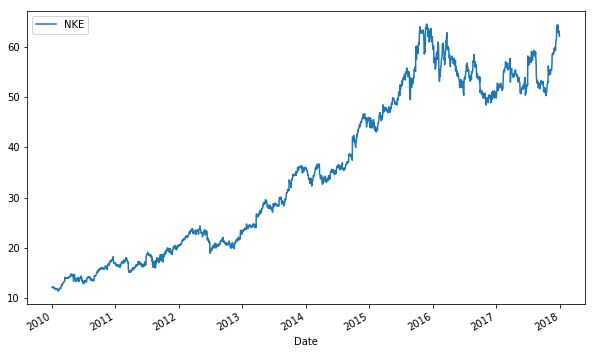

In [4]:
# Graficamos
closes.plot(figsize=(10,6));

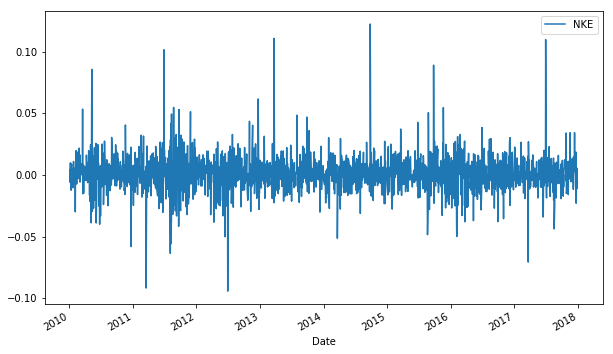

In [5]:
# Calcular rendimientos diarios y graficarlos
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [6]:
# Calculamos media y desviación estándar
mu, std = ret.mean().NKE, ret.std().NKE
mu, std

(0.0009165993523622087, 0.014710456609092698)

In [7]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [9]:
# Simulamos 100 escenarios para todo el 2018
simret = ret_sim(mu, std, 252, 10000, '2018-01-01')

In [10]:
# Obtenemos los precios
simcloses = closes.iloc[-1].NKE*((1+simret).cumprod())

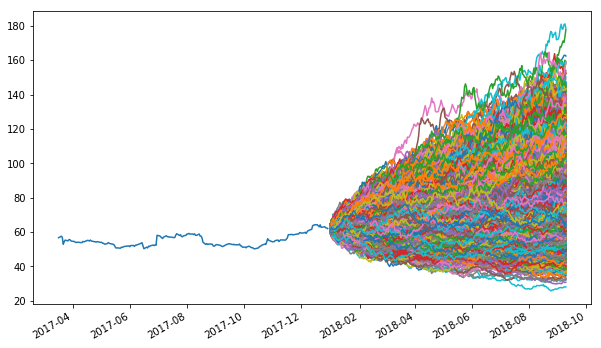

In [11]:
# Concatenar y graficar
simcloses_ex = pd.concat([closes.iloc[-200:], simcloses])
simcloses_ex.plot(figsize=(10,6), legend=False);

In [12]:
closes.iloc[-1].NKE*1.1

68.23834877014161

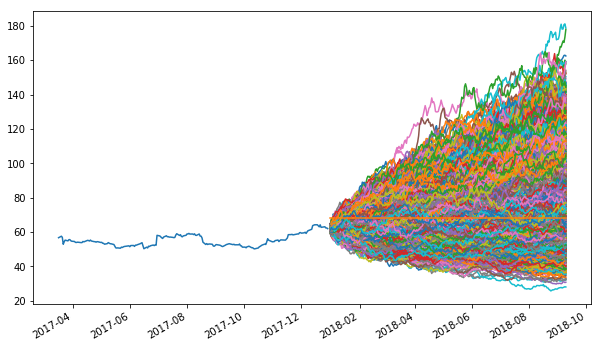

In [13]:
# Umbral de 110% del ultimo precio
K = closes.iloc[-1].NKE*1.1
# Fechas
dates = simcloses.index
# DataFrame de Strikes
Strike = pd.DataFrame(index = dates, columns=['K'], data = K*np.ones(len(dates)))
# Concatenar y graficar
simcloses_ex_K = pd.concat([simcloses_ex.T, Strike.T]).T
simcloses_ex_K.plot(figsize=(10,6), legend=False);

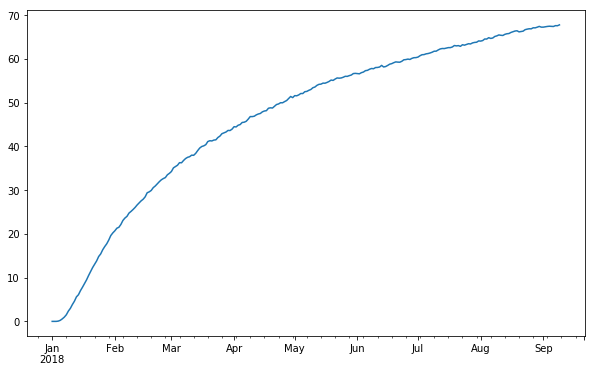

In [14]:
# Comparar cada escenario en cada fecha
TF = simcloses>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);

In [15]:
# Instrumento: Nike
name = ['NKE']
# Fechas de interés (inicio y fin): 2010-2016
start, end = '2018-01-01', '2018-12-31'
# Función DataReader
closes = get_closes(tickers=name, start_date=start, end_date=end, freq='d')

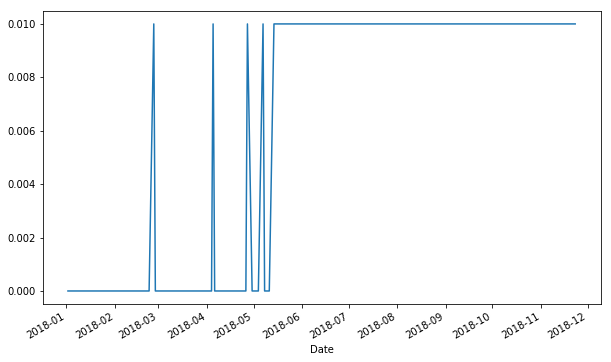

In [16]:
# Comparar cada escenario en cada fecha
TF = closes>K
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,6), legend=False);